In [2]:
import webdataset as wds
import matplotlib.pyplot as plt
import numpy as np
import io

# Load a tar file
dataset = wds.WebDataset("../../data/jump_wds/train/shard_00000000.tar")

# Get one sample
sample = next(iter(dataset))

# Load the numpy array
img_array = np.load(io.BytesIO(sample["image.npy"]))  # Should be (5, H, W)
print("Image array shape:", img_array.shape)
print("Value range:", img_array.min(), "-", img_array.max())

Image array shape: (5, 512, 512)
Value range: 278.5426 - 63248.492


In [3]:
import webdataset as wds
import numpy as np
import io
import random

# Load the tar file
dataset = wds.WebDataset("../../data/jump_wds/train/shard_00000000.tar")

# Convert dataset to a list for random access (careful with large datasets)
samples = list(iter(dataset))


# Function to inspect random samples
def inspect_random_samples(samples, num_samples=5):
    print(f"Total samples in dataset: {len(samples)}")
    for i in range(num_samples):
        # Choose a random sample
        random_index = random.randint(0, len(samples) - 1)
        sample = samples[random_index]

        # Load the numpy array
        img_array = np.load(io.BytesIO(sample["image.npy"]))  # (5, H, W)

        # Print the shape and value range
        print(f"Sample {i + 1}:")
        print(f"  Image array shape: {img_array.shape}")
        print(f"  Value range: {img_array.min()} - {img_array.max()}")
        print("---")


# Inspect 5 random samples
inspect_random_samples(samples, num_samples=20)

Total samples in dataset: 10
Sample 1:
  Image array shape: (5, 512, 512)
  Value range: 278.5426025390625 - 63248.4921875
---
Sample 2:
  Image array shape: (5, 512, 512)
  Value range: 182.85714721679688 - 65535.0
---
Sample 3:
  Image array shape: (5, 512, 512)
  Value range: 182.85714721679688 - 65535.0
---
Sample 4:
  Image array shape: (5, 512, 512)
  Value range: 4.546938419342041 - 16788.173828125
---
Sample 5:
  Image array shape: (5, 512, 512)
  Value range: 4.546938419342041 - 16788.173828125
---
Sample 6:
  Image array shape: (5, 512, 512)
  Value range: 169.0382080078125 - 40373.234375
---
Sample 7:
  Image array shape: (5, 512, 512)
  Value range: 7.234637260437012 - 21592.29296875
---
Sample 8:
  Image array shape: (5, 512, 512)
  Value range: 4.546938419342041 - 16788.173828125
---
Sample 9:
  Image array shape: (5, 512, 512)
  Value range: 105.9942855834961 - 61163.19140625
---
Sample 10:
  Image array shape: (5, 512, 512)
  Value range: 278.5426025390625 - 63248.49218

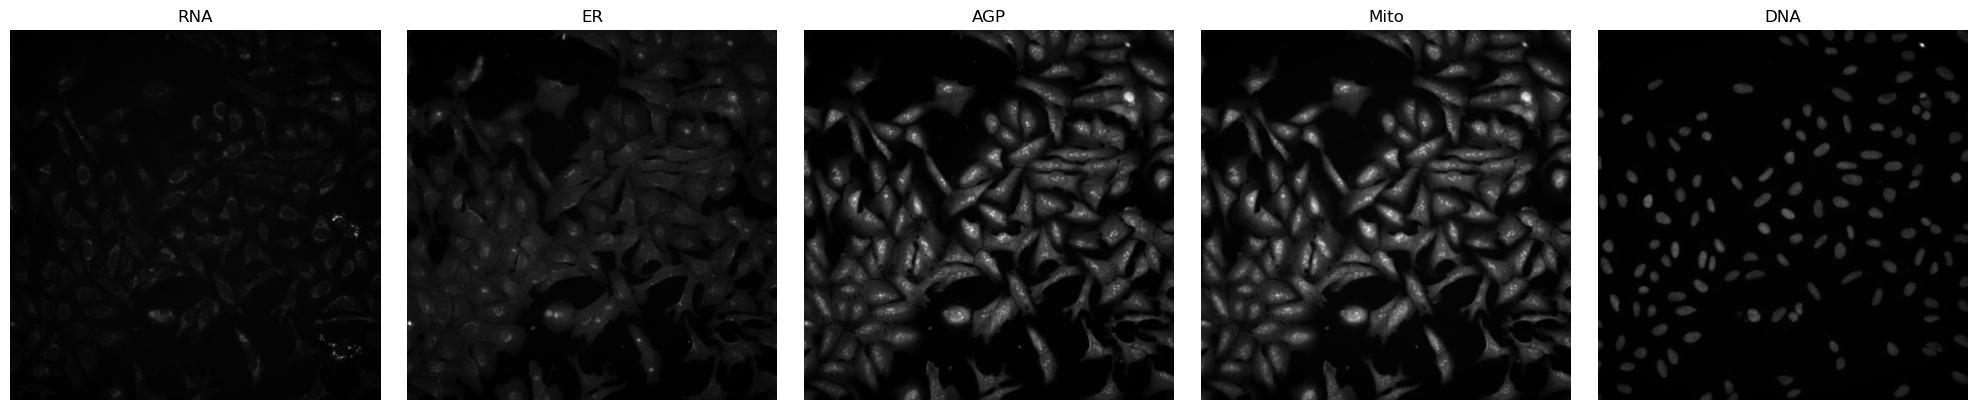

In [4]:
# Create a figure to show all channels
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
channels = ["RNA", "ER", "AGP", "Mito", "DNA"]

for ax, channel, img in zip(axes, channels, img_array):
    ax.imshow(img, cmap="gray")
    ax.set_title(channel)
    ax.axis("off")

plt.tight_layout()
plt.show()

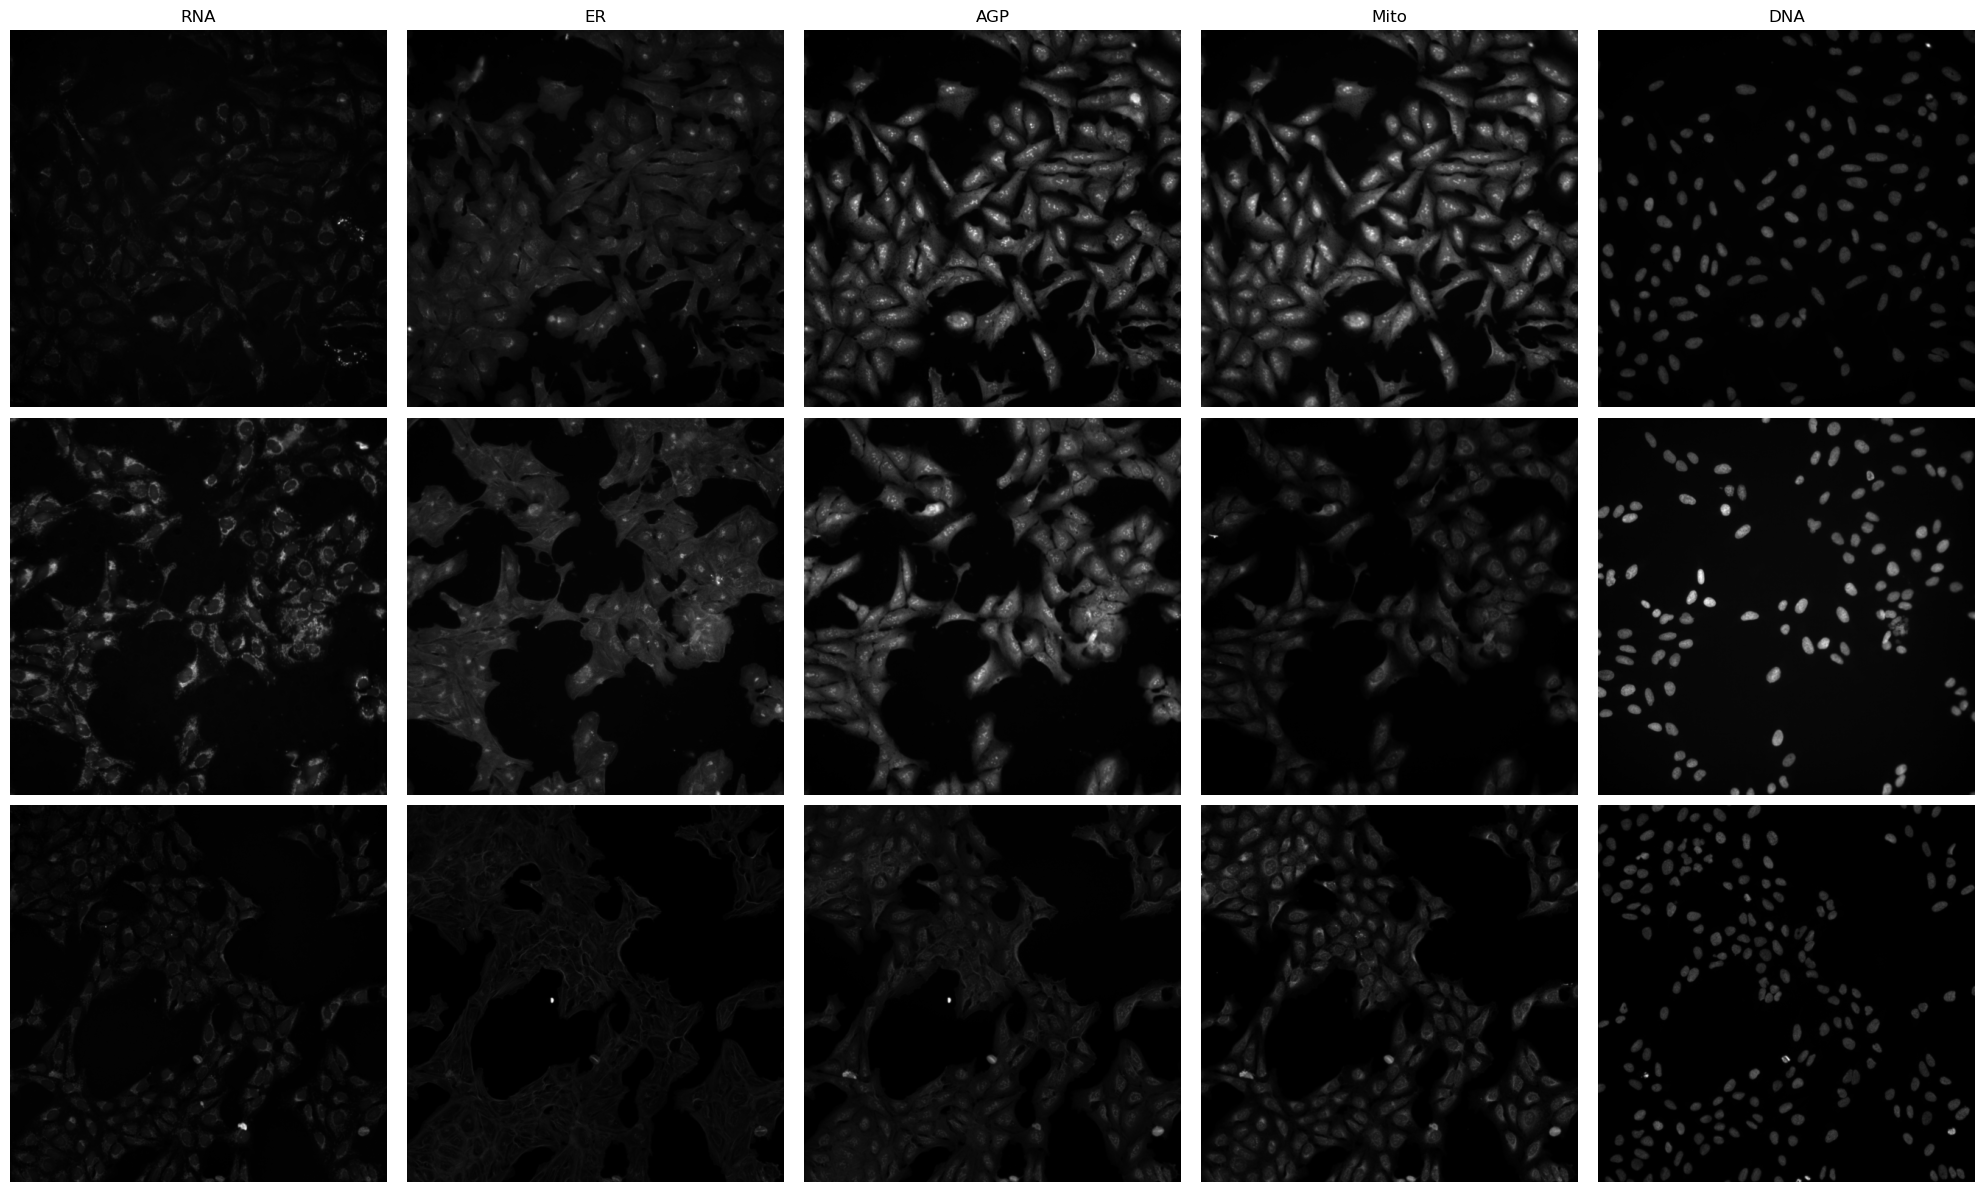

In [5]:
# Create a single iterator
dataset_iter = iter(dataset)

# Show multiple different samples
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
for row_idx in range(3):
    # Use the same iterator
    sample = next(dataset_iter)
    img_array = np.load(io.BytesIO(sample["image.npy"]))

    for ax, channel, img in zip(axes[row_idx], channels, img_array):
        ax.imshow(img, cmap="gray")
        ax.set_title(channel if row_idx == 0 else "")
        ax.axis("off")

plt.tight_layout()
plt.show()